In [76]:
import sys
sys.path.append('gan//gen_gan//')
sys.path.append('gan//gen_gan_256_4096//')
sys.path.append('vae_autoencoer//')

import vae ,gan_64,gan_256
import torch
import dlib
import cv2
import torch
import matplotlib.pyplot as plt
from imutils import face_utils
import numpy as np

In [77]:
def decode(img):
    img=img.permute(1,2,0).detach()
    return np.array(img*127.5+127.5,dtype=int)

In [78]:
vae_1000 = vae.Net()
gan64=gan_64.EncoderConv()
gan256=gan_256.EncoderConv()

In [80]:
gan64.load_state_dict(torch.load('gan\\gen_gan\\generator', map_location='cpu' ))

In [97]:
gan256.load_state_dict(torch.load('gan\\gen_gan_256_4096\\generator_256_4096', map_location='cpu' ))
vae_1000.load_state_dict(torch.load('vae_autoencoer\\vae_fromclassificator', map_location='cpu' ))

In [59]:
res=vae_1000.decoder(torch.FloatTensor(10,1000).normal_())

In [60]:
for i in range(10):
    cv2.imwrite('aa_noise_data\\from_vae\\im'+str(i)+'.jpg',decode(res[i])[:,:,::-1])

In [89]:
res=gan64(torch.FloatTensor(10,100).uniform_())

In [90]:
for i in range(10):
    cv2.imwrite('aa_noise_data\\from_gan64\\im'+str(i)+'.jpg',decode(res[i])[:,:,::-1])

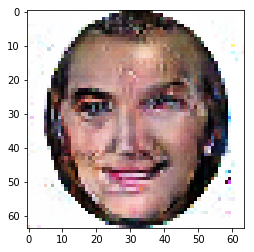

In [88]:
plt.imshow(decode(res[4]))

In [120]:
res=gan256(torch.FloatTensor(10,4096).uniform_())

C:\Users\ADMIN\Anaconda3\lib\site-packages\torch\nn\modules\upsampling.py:129: UserWarning: nn.UpsamplingNearest2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


In [123]:
for i in range(10):
    cv2.imwrite('aa_noise_data\\from_gan256\\im'+str(i)+'.jpg',decode(res[i])[:,:,::-1])